In [5]:
using NonlinearSolve
using DifferentialEquations
using Plots
using Profile
using ProfileSVG

In [7]:
function lvNonLinear(u, p)
    x, y = u
    α, β, γ, δ = p
    
    return [
        α * x - β * x * y,
        -γ * y + δ * x * y
    ]
end

function lvODE!(du, u, p, t)
    x, y = u
    α, β, γ, δ = p
    
    du[1] = α * x - β * x * y
    du[2] = -γ * y + δ * x * y
end

lvODE! (generic function with 1 method)

In [9]:
u0 = [10, 10]
p = [1.1, 0.4, 0.4, 0.1]
tspan = (0.0,100.0)

(0.0, 100.0)

In [11]:
nonLinearProb = NonlinearProblem(lvNonLinear, u0, p)
nonLinearSol = solve(nonLinearProb, NewtonRaphson(); store_trace=Val(true))

retcode: Success
u: 2-element Vector{Float64}:
 4.0
 2.75

In [13]:
ODEProb = ODEProblem(lvODE!, u0, tspan, p)
ODESol = solve(ODEProb, Rodas5P());

Equilibrium: [4.0, 2.75]


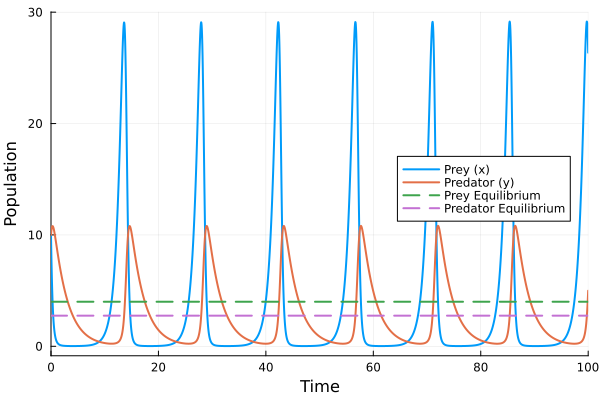

In [15]:
p1 = plot(ODESol, xlabel="Time", ylabel="Population", 
          label=["Prey (x)" "Predator (y)"],
          lw=2, legend=:right)
eq = nonLinearSol.u
println("Equilibrium: ", nonLinearSol.u)
hline!([eq[1]], label="Prey Equilibrium", linestyle=:dash, lw=2)
hline!([eq[2]], label="Predator Equilibrium", linestyle=:dash, lw=2)
plot(p1)

In [24]:
savefig(p1, "awseome_plot.png")

"C:\\Users\\Andrew\\Documents\\Repositories\\CSCI-3656-Interview-Read-Ahead\\lgprojects-verywellmade\\awseome_plot.png"

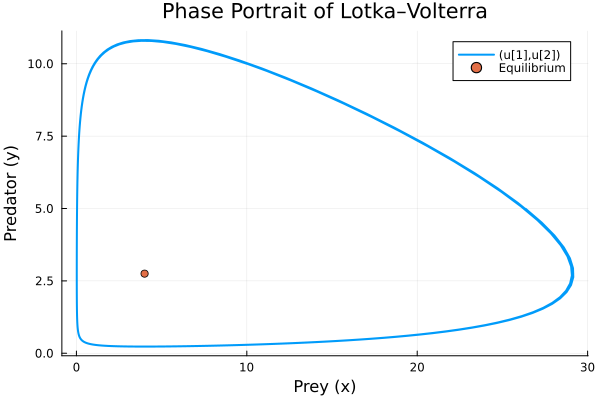

In [17]:
plot(ODESol, idxs=(1,2),
     xlabel="Prey (x)", ylabel="Predator (y)",
     title="Phase Portrait of Lotka–Volterra",
     lw=2)
scatter!([eq[1]], [eq[2]], label="Equilibrium", markersize=4)

In [19]:
#Profile.init(delay = 0.00005, n = 10^7)

In [21]:
solvers = [
    NewtonRaphson(),
    DFSane(),
    TrustRegion(),
    Broyden(),
]

names = ["NewtonRaphson", "DFSane", "TrustRegion", "Broyden"]

for (name, solver) in zip(names, solvers)
    println("\n Solver: ", name)
    prob = NonlinearProblem(lvNonLinear, u0, p)
    @time sol = solve(prob, solver; store_trace=Val(true))
    # @profview solve(prob, solver; store_trace=Val(true)) # Solve is too fast for profiler to take any samples

    println("Converged: ", sol.retcode == ReturnCode.Success)
    println("Iterations: ", length(sol.trace.history))
    println("Solution: ", sol.u)
end


 Solver: NewtonRaphson
  0.000062 seconds (150 allocations: 8.812 KiB)
Converged: true
Iterations: 9
Solution: [4.0, 2.75]

 Solver: DFSane
  0.000023 seconds (208 allocations: 10.734 KiB)
Converged: true
Iterations: 19
Solution: [-9.084686458917447e-14, -2.860396381559882e-16]

 Solver: TrustRegion
  0.000047 seconds (172 allocations: 10.625 KiB)
Converged: true
Iterations: 9
Solution: [4.0, 2.75]

 Solver: Broyden
  0.000042 seconds (181 allocations: 8.672 KiB)
Converged: true
Iterations: 22
Solution: [3.0646050843343166e-14, 2.6110246338131932e-14]


In [22]:
function lv_holling2NonLinear(u,p) #Testing with other similar equations
    x,y = u
    α, β, γ, δ, h = p
    denom = 1 + h*x
    return [
        α*x - β*x*y/denom,
        -γ*y + δ*x*y/denom
    ]
end

function lv_holling2!(du,u,p,t)
    x,y = u
    α, β, γ, δ, h = p
    denom = 1 + h*x
    du[1] = α*x - β*x*y/denom
    du[2] = -γ*y + δ*x*y/denom
end

lv_holling2! (generic function with 1 method)

In [23]:
u0 = [50, 10]
p = [1.1, 0.4, 0.4, 0.1, 0.03]
tspan = (0.0,100.0)

(0.0, 100.0)

In [ ]:
for (name, solver) in zip(names, solvers)
    println("\n Solver: ", name)
    prob = NonlinearProblem(lv_holling2NonLinear, u0, p)
    @time sol = solve(prob, solver; store_trace=Val(true))
    # @profview solve(prob, solver; store_trace=Val(true)) 

    println("Converged: ", sol.retcode == ReturnCode.Success)
    println("Iterations: ", length(sol.trace.history))
    println("Solution: ", sol.u)
end